In [1]:
import sys
print(sys.executable)
sys.path.append('/Users/sachaizadi/Documents/Projets/stack_under_flow/')

import json
import numpy as np
from stack_under_flow.model.preprocessing import Preprocessor
%matplotlib inline
import matplotlib.pyplot as plt

/Users/sachaizadi/Documents/Projets/stack_under_flow/venv/bin/python


In [12]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
def extract_text(tag: str):
    with open(
            f"/Users/sachaizadi/Documents/Projets/stack_under_flow/stack_under_flow/data/data_{tag}.json",
            "r") as f:
        json_data = json.loads(f.read())

    return [data.get("answer_body") for data in json_data if data.get("answer_body") is not None]

full_text = []
for tag in [
    "anaconda", "git", "gensim", "nltk", "pycharm", "jupyter", "keras",
    "matplotlib", "numpy", "python", "pytorch", "tensorflow", "django",
    "flask", "docker", "selenium"
]:
    full_text.extend(extract_text(tag))

In [3]:
preprocessor = Preprocessor(
    word2vec_model_src="/Users/sachaizadi/Documents/Projets/stack_under_flow/stack_under_flow/model/word2vec.model"
)

In [4]:
preprocessed_text = preprocessor.transform(full_text)

In [5]:
print(
    f"len(preprocessed_text)={len(preprocessed_text)}",
    f"preprocessed_text[0].shape={preprocessed_text[0].shape}",
    f"preprocessed_text[100].shape={preprocessed_text[300].shape}",
)

len(preprocessed_text)=393 preprocessed_text[0].shape=(8, 100) preprocessed_text[100].shape=(6, 100)


In [6]:
to_remove = []
for i in range(len(preprocessed_text)):
    try :
        preprocessed_text[i].shape[1]
        pass
    except:
        to_remove.append(i)

print(len(to_remove))

preprocessed_text = [preprocessed_text[i] for i in range(len(preprocessed_text)) if i not in to_remove]

13


In [7]:
preprocessed_text = np.vstack(preprocessed_text)

In [8]:
from sklearn.manifold import TSNE

In [9]:
text_tsne = TSNE().fit_transform(preprocessed_text)

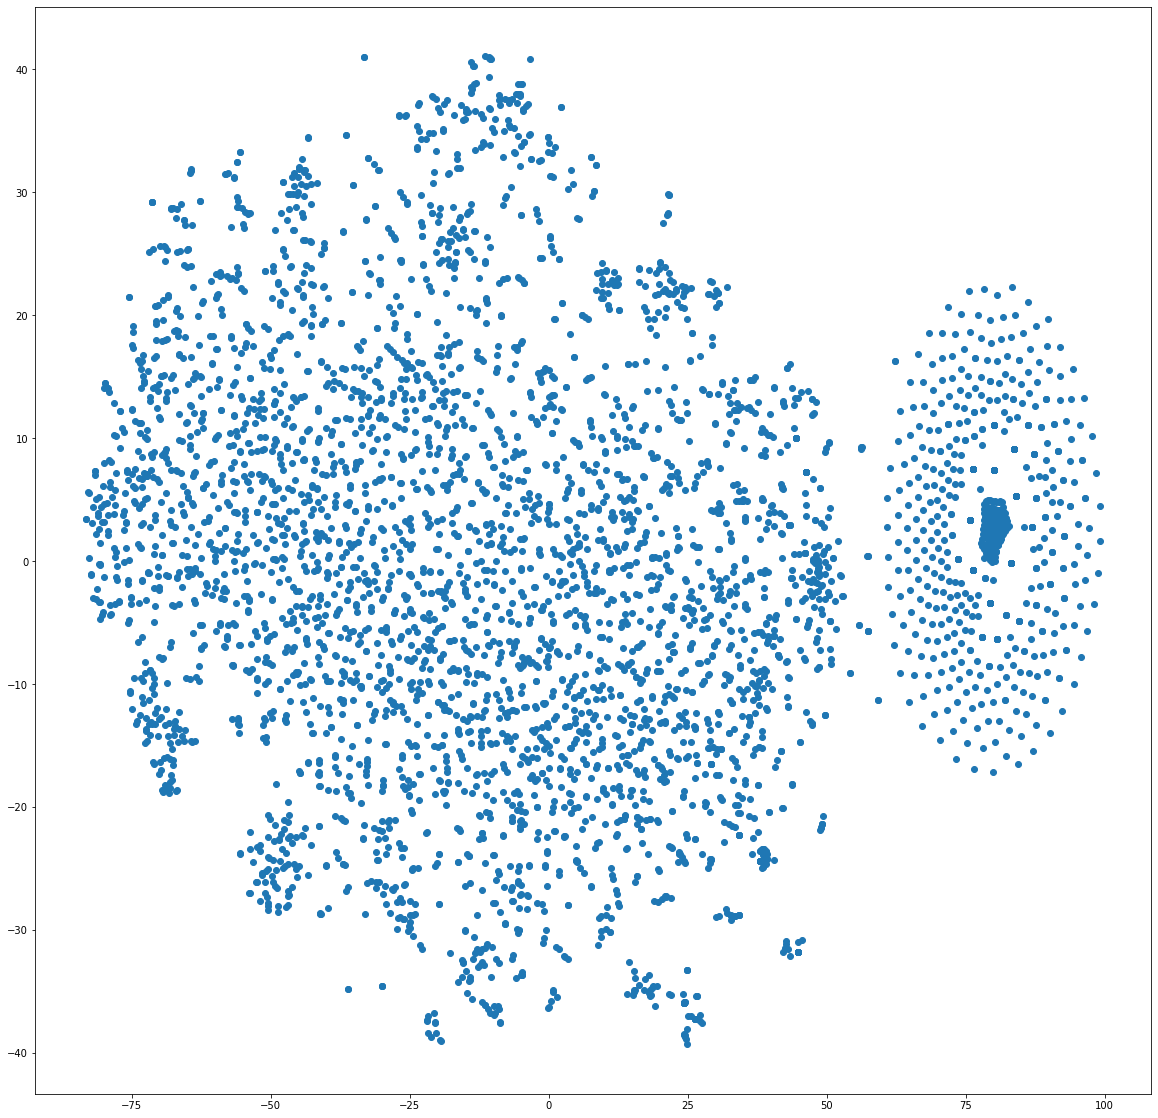

In [13]:
plt.figure(figsize=(20,20))
plt.plot(text_tsne.T[0], text_tsne.T[1],'o')

In [58]:
def get_most_similar_words(sentence):
    similar_words = preprocessor.word2vec_model.wv.most_similar(positive=[sentence], topn=10)
    return [similar_word[0] for similar_word in similar_words]

most_similar_words_preprocessed_sentences = [
    (i, get_most_similar_words(preprocessed_text[i])) for i in range(len(preprocessed_text))
]

In [59]:
trace0 = go.Scatter(
    x = text_tsne[:,0],
    y = text_tsne[:,1],
    mode = 'markers',
    showlegend = False,
    text=most_similar_words_preprocessed_sentences, #TODO: change this
    marker = dict(
        size = 8,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [trace0]

layout = dict(title = 'TSNE Exploration',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

In [ ]:
# TODO: checker ce cluster bizarre
# TODO: retrain les embeddings avec un CBOW plutôt